У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data_path = '../M4/yulu_rental.csv'
df = pd.read_csv(data_path)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

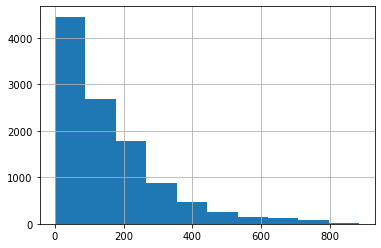

In [4]:
df['registered'].hist();

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

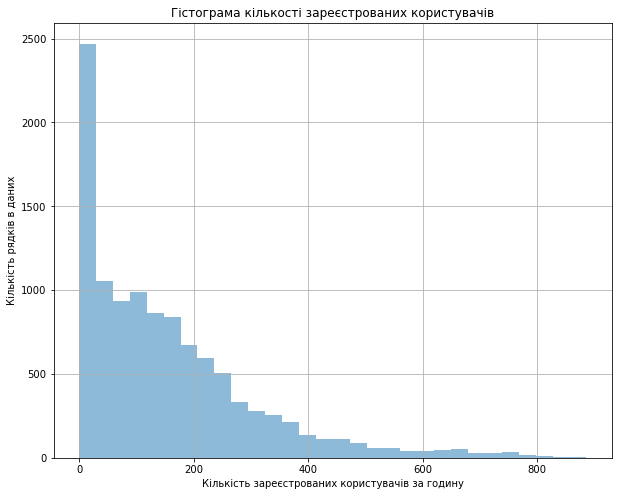

In [5]:
df['registered'].hist(figsize=(10,8), bins=30, alpha=0.5)
plt.xlabel('Кількість зареєстрованих користувачів за годину')
plt.ylabel('Кількість рядків в даних')
plt.title('Гістограма кількості зареєстрованих користувачів');

Висновки:
1. В порядка 2500 даних (~23% від всіх даних в наборі) к-сть зареєстрованих за годину знаходиться в межах до 30 осіб. 
2. Далі з ростом к-сті зареєстрованих за годину від 30 до 400 осіб к-сть даних поступово знижується від 1000 до 125 записів орієнтовно.
3. К-сть зареєстрованих за годину від 400 осіб - це мінімальний набір даних, при чому к-сть записів зменшується не так стрімко як в попередньому інтервалі (можливо є сегмент постійних зареєстрованих користувачів, які вже стабільно користуються послугою).

Отже, такий розподіл показника `Кількість зареєстрованих користувачів за годину` пояснює, чому при наявності розподілу даних від 0 до 800+ осіб середнє значення становить 156 осіб, а мода значень - 118 осіб (велика доля даних знаходиться в інтервалі 0-100 осіб). Для підтвердження додатково виведені показники нижче

In [13]:
df['registered'].describe()

count    10886.000000
mean       155.552177
std        151.039033
min          0.000000
25%         36.000000
50%        118.000000
75%        222.000000
max        886.000000
Name: registered, dtype: float64

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [6]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [7]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [8]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

In [9]:
df_wo_registered = df[df.registered==0].groupby(['dayofweek'])['registered'].count()
df_wo_registered

dayofweek
0    5
1    3
2    2
3    1
4    1
5    1
6    2
Name: registered, dtype: int64

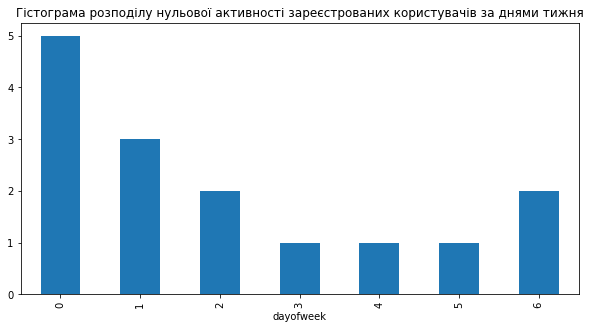

In [11]:
df_wo_registered.plot(figsize=(10,5), kind='bar')
plt.title('Гістограма розподілу нульової активності зареєстрованих користувачів за днями тижня');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

In [12]:
df_by_weather = df.groupby(['weather'])['registered'].sum()
df_by_weather

weather
1    1186163
2     419914
3      87106
4        158
Name: registered, dtype: int64

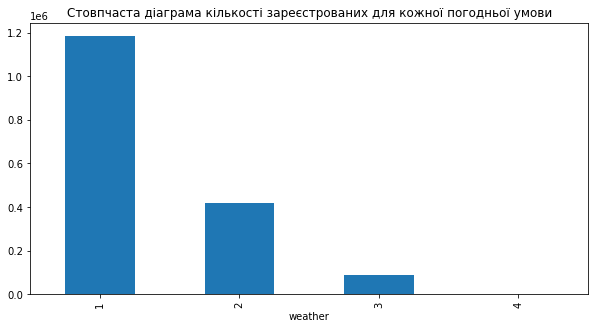

In [13]:
df_by_weather.plot(figsize=(10,5), kind='bar')
plt.title('Стовпчаста діаграма кількості зареєстрованих для кожної погодньої умови');

Висновок: дана діаграма підтверджує, що найбільша к-сть зареєстрованих (1 186 163 осіб) користуються послугою в період хорошої погоди, що абсолютно логічно, адже річ йде про відкритий транспорт - електровелосипеди. Звичайно, що з погіршанням погодних умов к-сть зареєстрованих користувачів зменшується і мінімальна (158 осіб) саме за поганої погоди (сильні дощі/ вітри/ сніг тощо).

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

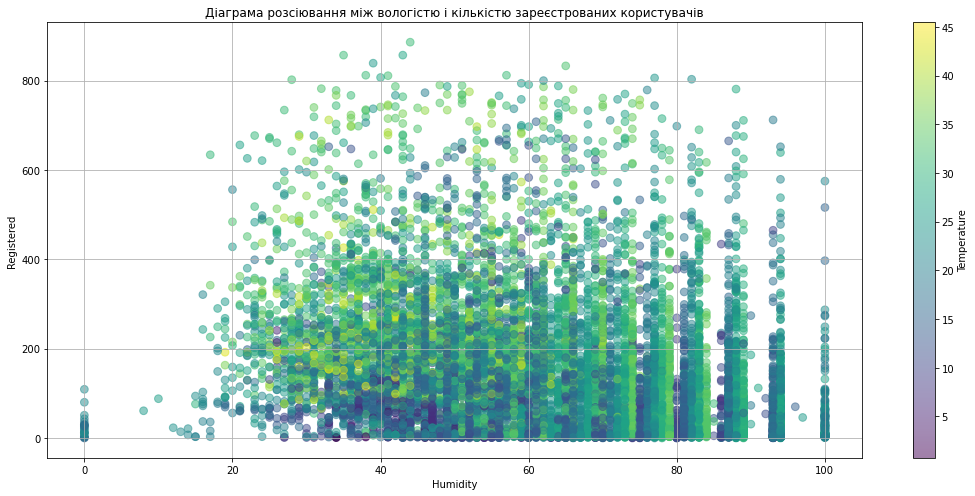

In [14]:
# Варіант 1 графіку з допомогою чату підтримки

fig, ax = plt.subplots(figsize=(15, 7))

scatter = ax.scatter(x=df['humidity'], y=df['registered'], alpha=0.5, s=60, c=df['atemp'], cmap='viridis')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Temperature')

ax.set_xlabel('Humidity')    # Назва осі X
ax.set_ylabel('Registered')  # Назва осі Y
ax.set_title('Діаграма розсіювання між вологістю і кількістю зареєстрованих користувачів')

plt.grid(True)
plt.tight_layout()  # Автоматична корекція відступів
plt.show();

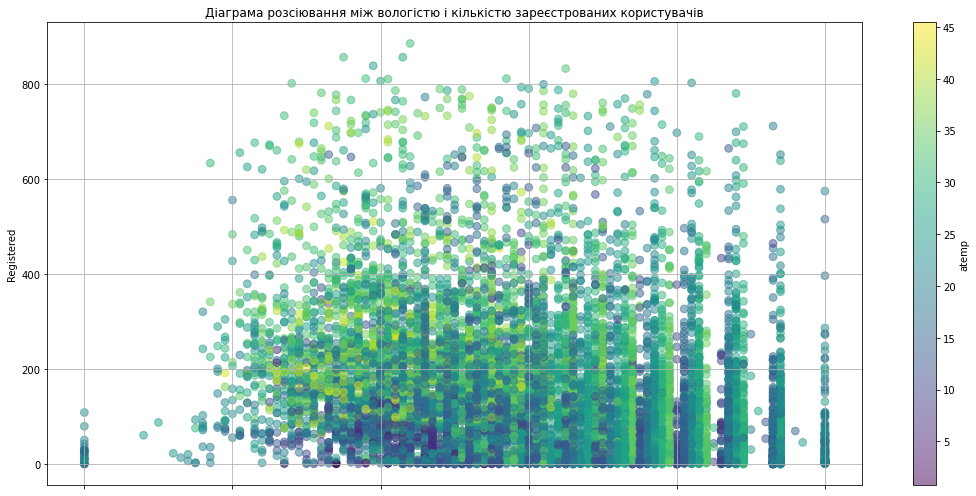

In [15]:
# Варіант 2 графіку без допомоги чату підтримки, де не вдалося вивести підпис та шкалу осі Х

df.plot.scatter(x='humidity', y='registered', figsize=(15,7), alpha=0.5, s = 60, c='atemp', colormap='viridis')
plt.xlabel('Humidity')
plt.ylabel('Registered')
plt.title('Діаграма розсіювання між вологістю і кількістю зареєстрованих користувачів')
plt.grid(True)
plt.tight_layout();

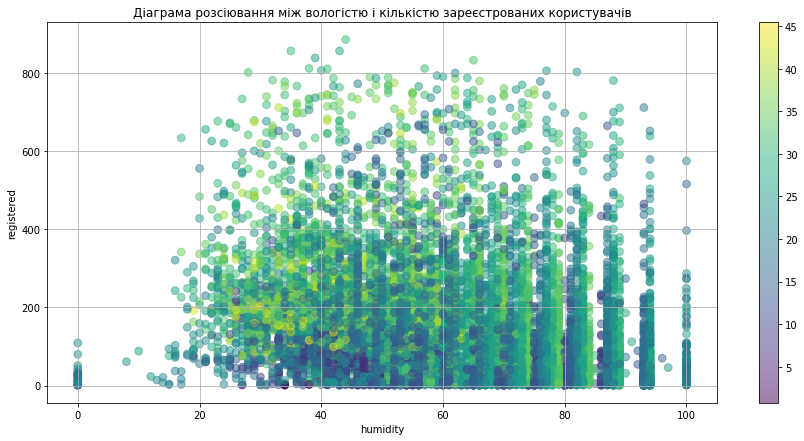

In [16]:
# Варіант 3 графіку без допомоги чату підтримки, оформлений іншим способом на основі матералів лекції по scatterplot

col_x = 'humidity'
col_y = 'registered'
color = 'atemp'

plt.figure(figsize=(15,7))
plt.scatter(df[col_x], df[col_y], alpha=0.5, s=60, c=df[color])
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.title('Діаграма розсіювання між вологістю і кількістю зареєстрованих користувачів')
plt.grid(True)
plt.colorbar();

Висновки: 
1. На мою думку, дана діаграма розсіювання показує відсутність лінійної кореляції між вологістю повітря та кількість зареєстрованих користувачів. Можливо специфіка клімату в Індії визначає свої особливості щодо рівня вологості повітря - наприклад, порівняно з країнами Європи, немає різких сильних змін сезонів та відповідних коливань вологості, що могло б позначитися на потребі в послузі електровелосипедів.
2. Діаграма також показує, що основна щільність даних знаходиться в інтервалі вологості 40-80, що можливо відповідає середнім допустимим показникам вологості в країні в "хорошу" погоду. Відповідно к-сть користувачів електровелосипедів знижується при рівні вологості до 40 та вище 80, що може відповідати наприклад сухій жаркій погоді (спека) чи сильним дощам відповідно. 
3. Додавання диференціації точок по кольору за показником "Як відчувається температура" показує і додатково підтверджує висновок, що к-сть зареєстрованих користувачів зменшується з погіршанням погодних умов - найменше точок при низькій вологості та високим температурам (по опису відповідає задушливій спеці), дещо більше користувачів за низьких температур (до 15 градусів по відчуттям). Основна маса зареєстрованих зосереджена в інтервалі температури 20-35 градусів, що можна віднести до комфортної теплої температури на період літо - початок осені. Це відповідає помісячній динаміці к-сті користувачів з попереднього аналізу

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)